In [1]:
import os
import h5py
import sv as SV
import numpy as np
import astropy.table as atable
from astropy.cosmology import FlatLambdaCDM

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask
from desitarget.targetmask import bgs_mask as main_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dir_fuji = '/global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/'
dir_guad = '/global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog/'
sv1 = atable.Table.read(os.path.join(dir_fuji, 'ztile-sv1-bright-cumulative.fits'))
sv3 = atable.Table.read(os.path.join(dir_fuji, 'ztile-sv3-bright-cumulative.fits'))
main = atable.Table.read(os.path.join(dir_guad, 'ztile-main-bright-cumulative.fits'))

In [4]:
sv3[:2]

TARGETID,LASTNIGHT,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39632946289707054,20210405,20210405,-1.0884250801567422e-05,6.732821919742601e-06,0,9267.8989302644,4097.28766737681 .. 0.0,7907,STAR,G,5,2148.3693183338146,0,311,311,0,0,217.49569658349824,33.35535717170939,-13.707138,-2.427212,2015.5,5400.0,2305843009213693952,1,TGT,81.24594,-283.4049,101500,0.8055047524179098,516,9011,2174p332,512404,2094,PSF,0.009200617,43.620934,67.07036,76.90401,22.017822,12.771733,93.0877,96.014404,29.09171,3.869387,1.0587099,33.820114,52.00088,59.625095,33.820114,52.00088,59.625095,0,0.0,0.0,0.0,0.0,1287402123263271552,G2,18.023634,18.390764,17.520334,0.22377586,N,101500,9,2305843009213693952,0,768,0,0,0,0,217.49569658349824,33.35535717170939,201,1,378.2013,1,1,0.004,0.004,-0.002,0.002,217.49571565131004,0.0,33.35536475087667,0.0,0.789,81.205,-283.383,19.547792,0.011813587,3.8494592,9.616641,67.62338,31.899538,0.3152002,0.113029405,1844.8038,3.8133337,349.42694,0.007437738,398.9302,2563.135,1.2044522,5.5802956,2.740209e-06,12.772448,5.360235e-07,0.0,611.14453,4.3530713e-06,2.7009082,5.971848,1864.3517,16.597595,353.2764,9.624079,1077.6981,2595.0347,4.2205606,11.665173,5,False
39632951343844427,20210405,20210405,0.05944829750203393,2.065676400678239e-06,0,8419.192837715149,3228.1315388897933 .. 98.80107543461622,7899,GALAXY,--,10,6882.500358581543,0,272,272,1,0,217.6192064649323,33.39798702024216,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,55.435486,-272.15115,102100,0.8356434365553858,516,9011,2175p335,513609,3147,REX,0.0082971975,23.578526,34.84529,43.64486,27.948347,16.314814,127.982834,106.42935,43.389038,3.472669,1.00

In [5]:
sv1_bright = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_faint  = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0 

sv3_bright = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_faint  = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

main_bright  = (main['BGS_TARGET'] & main_bgs_mask['BGS_FAINT']) != 0 
main_faint  = (main['BGS_TARGET'] & main_bgs_mask['BGS_FAINT']) != 0 

In [6]:
sv1_cuts = ((sv1['COADD_FIBERSTATUS'] == 0) & (sv1['Z'] != 1e20) & (sv1['ZWARN'] == 0) & (sv1['DELTACHI2'] > 40))
print(np.mean(sv1_cuts))
sv3_cuts = ((sv3['COADD_FIBERSTATUS'] == 0) & (sv3['Z'] != 1e20) & (sv3['ZWARN'] == 0) & (sv3['DELTACHI2'] > 40))
print(np.mean(sv3_cuts))
main_cuts = ((main['COADD_FIBERSTATUS'] == 0) & (main['Z'] != 1e20) & (main['ZWARN'] == 0) & (main['DELTACHI2'] > 40))
print(np.mean(main_cuts))

0.6850104384133612
0.7030595964335993
0.791060212514758


In [7]:
print('SV1: BRIGHT %i FAINT %i ALL %i redshifts' % (np.sum(sv1_bright & sv1_cuts), np.sum(sv1_faint & sv1_cuts), np.sum(sv1_bright & sv1_cuts) + np.sum(sv1_faint & sv1_cuts)))
print('SV3: BRIGHT %i FAINT %i ALL %i redshifts' % (np.sum(sv3_bright & sv3_cuts), np.sum(sv3_faint & sv3_cuts), np.sum(sv3_bright & sv3_cuts) + np.sum(sv3_faint & sv3_cuts)))
print('MAIN: BRIGHT %i FAINT %i ALL %i redshifts' % (np.sum(main_bright & main_cuts), np.sum(main_faint & main_cuts), np.sum(main_bright & main_cuts) + np.sum(main_faint & main_cuts)))

print('%i total BRIGHT SUCCESSFUL REDSHIFTS' % (np.sum(sv1_bright & sv1_cuts) + np.sum(sv3_bright & sv3_cuts)))
print('%i total FAINT SUCCESSFUL REDSHIFTS' % (np.sum(sv1_faint & sv1_cuts) + np.sum(sv3_faint & sv3_cuts)))

SV1: BRIGHT 50600 FAINT 36767 ALL 87367 redshifts
SV3: BRIGHT 234735 FAINT 164765 ALL 399500 redshifts
MAIN: BRIGHT 266398 FAINT 266398 ALL 532796 redshifts
285335 total BRIGHT SUCCESSFUL REDSHIFTS
201532 total FAINT SUCCESSFUL REDSHIFTS


In [8]:
def stephist(nh, _edges):
    bin_edges = np.sort(list(_edges) + list(_edges[1:-1]))
    return bin_edges, np.array([[x, x] for x in nh]).flatten()

In [15]:
#gama_dr3 = atable.Table.read('/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/gama_specobj.fits')
#gama_dr4 = atable.Table.read('/global/cscratch1/sd/chahah/bgs-cmxsv/gama_dr4/TilingCatv46.fits')
#gama_dr4 = atable.Table.read('/global/cfs/cdirs/desi/users/chahah/gama_specobjv27.fits')
gama_dr4 = atable.Table.read('/global/cfs/cdirs/desi/users/chahah/TilingCatv46.fits') # see documentation here: #http://www.gama-survey.org/dr4/schema/table.php?id=469

gama_dr4 = gama_dr4[(gama_dr4['NQ'] >= 3) & (gama_dr4['SURVEY_CLASS'] >= 3)]

In [16]:
mpl.rcParams['text.usetex'] = False

#plt.hist(gama_dr4['R_PETRO'])

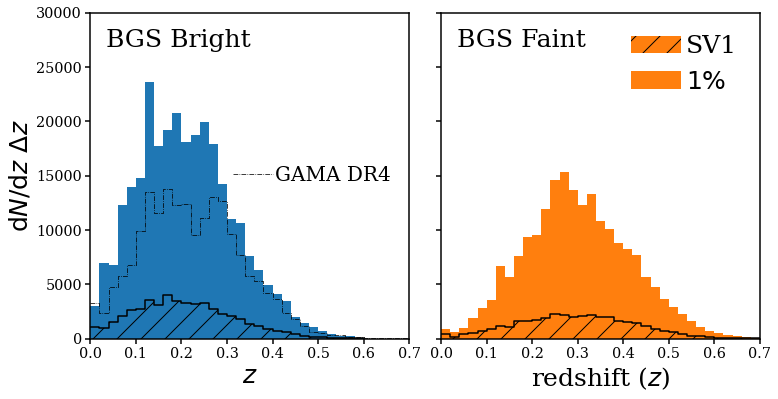

In [17]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)

nh, edges = np.histogram(sv1['Z'][sv1_bright & sv1_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist0 = stephist(nh, edges)

sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C0', hatch='/')
sub.plot(bin_edges, nhist0, c='k')


nh, edges = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist1 = stephist(nh, edges)
sub.fill_between(bin_edges, nhist0, nhist0 + nhist1, facecolor='C0')

nh, edges = np.histogram(gama_dr4['Z'], range=(0., 0.7), bins=35)
bin_edges, nhist0 = stephist(nh, edges)
sub.plot(bin_edges, nhist0, c='k', lw=0.75, linestyle='-.', label='GAMA DR4')


sub.text(0.05, 0.95, 'BGS Bright', ha='left', va='top', transform=sub.transAxes, fontsize=25)
sub.legend(loc='center right', fontsize=20, handletextpad=0.1)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'${\rm d}N/{\rm d}z$ $\Delta z$', fontsize=25)
sub.set_ylim(0., 3.e4)

sub = fig.add_subplot(122)

nh, edges = np.histogram(sv1['Z'][sv1_faint & sv1_cuts], range=(0., 0.7), bins=35)
bin_edges, nhist0 = stephist(nh, edges)

sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C1', hatch='/', label='SV1')
sub.plot(bin_edges, nhist0, c='k')

nh, edges = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], range=(0., 0.7), bins=35)
bin_edges, nhist1 = stephist(nh, edges)
sub.fill_between(bin_edges, nhist0, nhist0 + nhist1, facecolor='C1', label=r'$1\%$')


sub.text(0.05, 0.95, 'BGS Faint', ha='left', va='top', transform=sub.transAxes, fontsize=25)
#sub.text(0.95, 0.95, '1\%', ha='right', va='top', transform=sub.transAxes, fontsize=25)

sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
sub.set_xlabel('redshift ($z$)', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_yticklabels([])
sub.set_ylim(0., 3.0e4)

fig.subplots_adjust(wspace=0.1)
fig.savefig('figs/dndz.pdf', bbox_inches='tight')

In [18]:
nh, edges = np.histogram(sv1['Z'][sv1_bright & sv1_cuts], range=(0., 0.6), bins=30)

In [19]:
nh

array([1117,  996, 1548, 2073, 2595, 2774, 3536, 3146, 4061, 3435, 3271,
       3183, 3282, 2752, 2248, 2046, 1772, 1357, 1187,  855,  693,  620,
        403,  242,  190,  126,   72,   36,   24,   25])

In [20]:
nh_sv1, edges = np.histogram(sv1['Z'][sv1_bright & sv1_cuts], range=(0., 0.6), bins=30)
nh_sv3, edges = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], range=(0., 0.6), bins=30)
np.savetxt('dat/fig18_dNdz_dz_bgsbright.dat', 
           np.vstack([edges[:-1], edges[1:], nh_sv1, nh_sv3]).T, 
           fmt='%f %f %i %i', header='dN/dz * dz\n z_low, z_high, N_SV1, N_SV3')

nh_sv1, edges = np.histogram(sv1['Z'][sv1_faint & sv1_cuts], range=(0., 0.7), bins=35)
nh_sv3, edges = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], range=(0., 0.7), bins=35)
np.savetxt('dat/fig18_dNdz_dz_bgsfaint.dat', 
           np.vstack([edges[:-1], edges[1:], nh_sv1, nh_sv3]).T, 
           fmt='%f %f %i %i', header='dN/dz * dz\n z_low, z_high, N_SV1, N_SV3')

In [21]:
zlow, zhigh, volz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_ANY_nz.dat', skiprows=2, unpack=True, usecols=[1, 2, 5])

In [22]:
zlim = (zlow < 0.7)

zlow = zlow[zlim]
zhigh = zhigh[zlim]
volz = volz[zlim]

In [23]:
nz_all, zedges = np.histogram(sv3['Z'][sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_bright, _ = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_faint, _ = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], bins=np.array(list(zlow)+[zhigh[-1]]))

nz_all = nz_all.astype(float) / volz
nz_bright = nz_bright.astype(float) / volz
nz_faint = nz_faint.astype(float) / volz

In [24]:
nz_all

array([3.90392664e-01, 1.27622677e-01, 8.77224941e-02, 9.55205385e-02,
       4.89250907e-02, 5.23638401e-02, 5.34683607e-02, 3.08226437e-02,
       3.16298228e-02, 2.52611939e-02, 2.32743712e-02, 2.07396462e-02,
       2.23050638e-02, 1.51172246e-02, 1.19508633e-02, 9.66653689e-03,
       7.36603144e-03, 5.81243616e-03, 4.81524570e-03, 3.64153936e-03,
       3.19380156e-03, 2.23671197e-03, 1.52200759e-03, 1.16241342e-03,
       8.30123485e-04, 6.33734194e-04, 4.12875588e-04, 3.05213519e-04,
       1.63014499e-04, 1.19362051e-04, 7.56659667e-05, 5.30910575e-05,
       2.65796114e-05, 2.08349893e-05, 1.05418749e-05])

In [25]:
np.savetxt('dat/fig19_nz_bgs_svda.dat', np.vstack([zedges[:-1], zedges[1:], nz_all, nz_bright, nz_faint]).T, header='zlow, zhigh, nz_all, nz_bright, nz_faint')

In [26]:
# DESI LRG n(z)
#nz_lrg = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/LRG_main_nz.dat', skiprows=2, unpack=True, usecols=[3])
zmid_lrg, zlow_lrg, zhigh_lrg, nz_lrg, vol_lrg = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/everest/LSScats/1/LRGzdone_nz.dat', skiprows=2, unpack=True, usecols=[0, 1, 2, 3, 5])
vol_lrg /= 1130.138 

zlo_lrg, zhi_lrg, N_lrg = np.loadtxt('main_lrg_dndz.txt', unpack=True, skiprows=1, usecols=[0, 1, 2])
_zmid = 0.5 * (zlo_lrg[1::2] + zhi_lrg[2::2])
N_lrg = N_lrg[1::2] + N_lrg[2::2]

nz_lrg = N_lrg[_zmid < 0.7] / vol_lrg[zmid_lrg < 0.7]
nz_lrg[zmid_lrg[zmid_lrg < 0.7] < 0.4] = 0.

zedges_lrg = np.concatenate([[zlow_lrg[0]], zhigh_lrg[zmid_lrg < 0.7]])

In [29]:
# SDSS MGS n(z)
sdss_dr16 = atable.Table.read('/global/cfs/cdirs/desi/users/chahah/specObj-dr16.fits')
is_mgs = ((sdss_dr16['LEGACY_TARGET1']  & (64 | 128 | 256)) > 0)
nz_mgs, _ = np.histogram(sdss_dr16['Z'][is_mgs], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_mgs = nz_mgs.astype(float) / (volz / 168.8 * 7500.)

In [30]:
# GAMA n(z) (assuming DR4 footprint is the same as DR3)
area_gama = (#(8.6 * 6.53) + #G02
    (12. * 5.0) + #G09
    (12. * 4.0) + #G12
    (12. * 4.0)) #G15

nz_gama, _ = np.histogram(gama_dr4['Z'], bins=np.array(list(zlow)+[zhigh[-1]]))
nz_gama = nz_gama.astype(float) / (volz / 168.8 * area_gama)

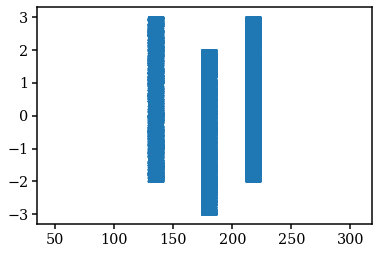

In [31]:
plt.scatter(gama_dr4['RA'], gama_dr4['DEC'], s=1)

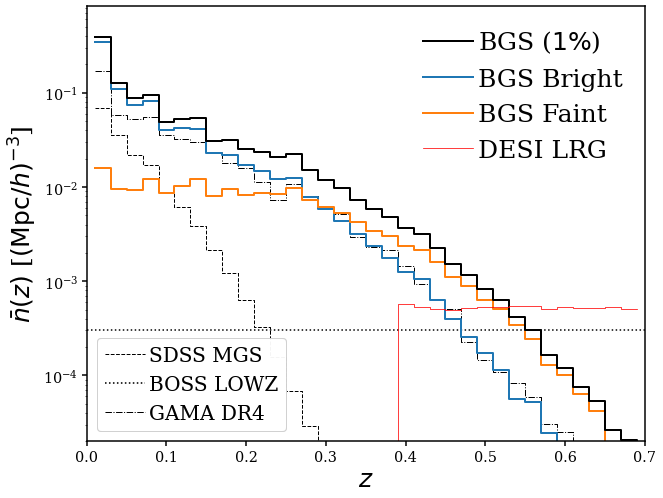

In [32]:
fig = plt.figure(figsize=(10,8))
sub = fig.add_subplot(111)
bin_edges, nhist = stephist(nz_mgs, zedges)
_sdss, = sub.plot(bin_edges, nhist, c='k', ls='--', lw=1)#, label='SDSS MGS')
bin_edges, nhist = stephist(nz_gama, zedges)
_gama, = sub.plot(bin_edges, nhist, c='k', ls='-.', lw=1)#, label='SDSS MGS')
_lowz = sub.axhline(3e-4, color='k', linestyle=':')#, label='BOSS LOWZ')


sub.plot([], [], c='k', lw=2, label='BGS ($1\%$)')

bin_edges, nhist = stephist(nz_bright, zedges)
sub.plot(bin_edges, nhist, c='C0', lw=2, label='BGS Bright')

bin_edges, nhist = stephist(nz_faint, zedges)
sub.plot(bin_edges, nhist, c='C1', lw=2, label='BGS Faint')

bin_edges, nhist = stephist(nz_all, zedges)
sub.plot(bin_edges, nhist, c='k', lw=2)

bin_edges, nhist = stephist(nz_lrg, zedges_lrg)
sub.plot(bin_edges, nhist, c='r', lw=0.75, label='DESI LRG')


legend1 = sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
fig.gca().add_artist(legend1)
legend2 = sub.legend([_sdss, _lowz, _gama], ['SDSS MGS', 'BOSS LOWZ', 'GAMA DR4'], loc='lower left', handletextpad=0.2, frameon=True, fontsize=20)
fig.gca().add_artist(legend2)


sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'$\bar{n}(z)$ [$({\rm Mpc}/h)^{-3}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(2e-5, None)
fig.savefig('figs/nofz.pdf', bbox_inches='tight')

In [23]:
!pwd

/global/u1/c/chahah/projects/bgs-cmxsv/doc/sv_paper


In [25]:


sub.plot([], [], c='k', lw=2, label='BGS ($1\%$)')

bin_edges, nhist = stephist(nz_bright, zedges)
sub.plot(bin_edges, nhist, c='C0', lw=2, label='BGS Bright')

bin_edges, nhist = stephist(nz_faint, zedges)
sub.plot(bin_edges, nhist, c='C1', lw=2, label='BGS Faint')

bin_edges, nhist = stephist(nz_all, zedges)
sub.plot(bin_edges, nhist, c='k', lw=2)

bin_edges, nhist = stephist(nz_lrg, zedges_lrg)
sub.plot(bin_edges, nhist, c='r', lw=0.75, label='DESI LRG')


legend1 = sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
fig.gca().add_artist(legend1)
legend2 = sub.legend([_sdss, _lowz, _gama], ['SDSS MGS', 'BOSS LOWZ', 'GAMA DR4'], loc='lower left', handletextpad=0.2, frameon=True, fontsize=20)
fig.gca().add_artist(legend2)


sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'$\bar{n}(z)$ [$({\rm Mpc}/h)^{-3}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(2e-5, None)
fig.savefig('figs/nofz.pdf', bbox_inches='tight')

(2e-05, 1.0)

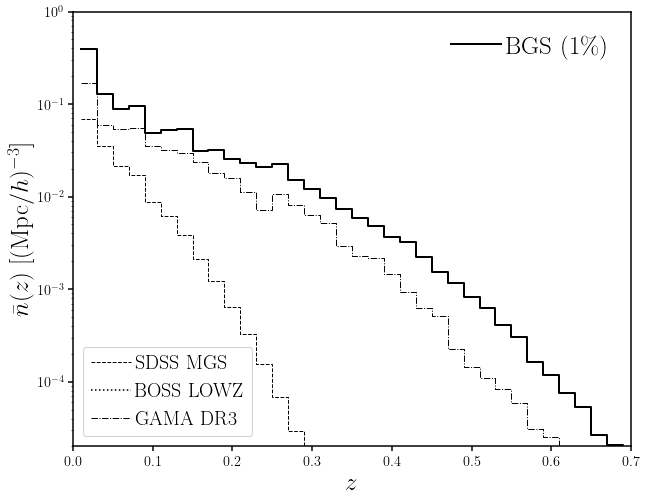

In [29]:
mpl.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(10,8))
sub = fig.add_subplot(111)
bin_edges, nhist = stephist(nz_mgs, zedges)
_sdss, = sub.plot(bin_edges, nhist, c='k', ls='--', lw=1)#, label='SDSS MGS')
bin_edges, nhist = stephist(nz_gama, zedges)
_gama, = sub.plot(bin_edges, nhist, c='k', ls='-.', lw=1)#, label='SDSS MGS')
# # _lowz = sub.axhline(3e-4, color='k', linestyle=':')#, label='BOSS LOWZ')


sub.plot([], [], c='k', lw=2, label='BGS ($1\%$)')

bin_edges, nhist = stephist(nz_all, zedges)
sub.plot(bin_edges, nhist, c='k', lw=2)

# bin_edges, nhist = stephist(nz_bright, zedges)
# sub.plot(bin_edges, nhist, c='C0', lw=2, label='BGS Bright')

# bin_edges, nhist = stephist(nz_faint, zedges)
# sub.plot(bin_edges, nhist, c='C1', lw=2, label='BGS Faint')


legend1 = sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
fig.gca().add_artist(legend1)
legend2 = sub.legend([_sdss, _lowz, _gama], ['SDSS MGS', 'BOSS LOWZ', 'GAMA DR3'], loc='lower left', handletextpad=0.2, frameon=True, fontsize=20)
fig.gca().add_artist(legend2)

sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.7)
sub.set_ylabel(r'$\bar{n}(z)$ [$({\rm Mpc}/h)^{-3}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(2e-5, 1.)

In [22]:
from astropy.cosmology import Planck18

In [23]:
zbins = 0.05 * np.arange(21)
nz_bright, _ = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], bins=zbins)
nz_faint, _ = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], bins=zbins)

In [24]:
nbarz_bright, nbarz_faint = [], []
for iz in range(len(zbins)-1): 
    nbarz_bright.append(nz_bright[iz] / np.sum(nz_bright) * 
        864. * # sq deg
        0.8 * # fib assign eff.
        0.984 / # z-success rate        
        ((Planck18.comoving_volume(zbins[iz+1]) - Planck18.comoving_volume(zbins[iz])).value * Planck18.h**3 / (4*np.pi*(180/np.pi)**2))
    )
    nbarz_faint.append(nz_faint[iz] / np.sum(nz_faint) * 
        533. * # sq deg
        0.61 * # fib assign eff.
        0.979 / # z-success rate        
        ((Planck18.comoving_volume(zbins[iz+1]) - Planck18.comoving_volume(zbins[iz])).value * Planck18.h**3 / (4*np.pi*(180/np.pi)**2))
    )

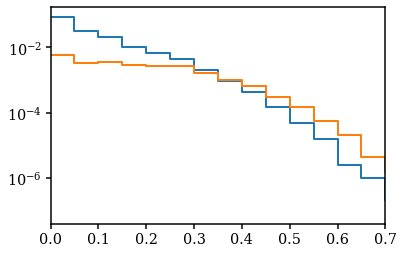

In [25]:
bin_edges, nhist = stephist(nbarz_bright, zbins)
plt.plot(bin_edges, nhist, c='C0', lw=2)
bin_edges, nhist = stephist(nbarz_faint, zbins)
plt.plot(bin_edges, nhist, c='C1', lw=2)
plt.xlim(0., 0.7)
plt.yscale('log')
#plt.ylim(2e-5, 1.)

In [26]:
np.savetxt('dat/nbarz_bgs.dat', 
           np.vstack([zbins[:-1], zbins[1:], nbarz_bright, nbarz_faint]).T, 
           header='zlow, zhigh, nz_bright (targ/deg2), nz_faint (targ/deg2)',
           fmt='%.2f %.2f %.5e %.5e'
          )

In [20]:
np.savetxt('dat/nz_bgs_svoverview.dat', 
           np.vstack([zbins[:-1], zbins[1:], nbarz_bright, nbarz_faint]).T, 
           header='zlow, zhigh, nz_bright (targ/deg2), nz_faint (targ/deg2)',
           fmt='%.1f %.1f %.5e %.5e'
          )

In [21]:
!pwd

/global/u1/c/chahah/projects/bgs-cmxsv/doc/sv_paper
